In [5]:
import pandas as pd
import re
import matplotlib

# 调整Pandas显示设置，以允许显示更长的文本内容
pd.set_option('display.max_colwidth', None)

file_name = './other_noPic_04.jsonl'

# 加载JSONL文件
df = pd.read_json(file_name, lines=True)

# 显示前几行数据以确认加载正确
df.head()


,question,answer,detail_data,topic_number
0,3.我们经常将调查、收集得来的数据用各类统计图进行整理与表示．下列统计图中，能凸显由数据所表现出来的部分与整体的关系的是()\nA. 条形图 B. 扇形图\nC. 折线图 D. 频数分布直方图,【答案】B\n【解析】\n【分析】\n根据统计图的特点判定即可．\n【详解】解：统计图中，能凸显由数据所表现出来的部分与整体的关系的是扇形图．\n故选：B．\n【点睛】本题考查了统计图的特点，条件统计图能反映各部分的具体数值，扇形统计图能反映各个部分占总体的百分比，折线统计图能反映样本或总体的趋势，频数分布直方图能反映样本或总体的分布情况，熟练掌握各统计图的特点是解题的关键．,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN
1,"9.如果函数y＝kx（k≠0）的图象经过第二、四象限，那么y的值随x的值增大而\_\_\_\_\_．（填""增大""或""减小""）",【答案】减小\n【解析】\n【分析】\n根据正比例函数的性质进行解答即可．\n【详解】解：函数y＝kx（k≠0）的图象经过第二、四象限，那么y的值随x的值增大而减小，\n故答案为：减小．\n【点睛】此题考查的是判断正比例函数的增减性，掌握正比例函数的性质是解决此题的关键．,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN
2,10.如果关于x的方程x^2^﹣4x+m=0有两个相等的实数根，那么m的值是\_\_\_\_．,【答案】4．\n【解析】\n【分析】\n一元二次方程有两个相等的实根，即根的判别式△=b^2^-4ac=0，即可求m值．\n【详解】依题意．\n∵方程x^2^﹣4x+m=0有两个相等的实数根，\n∴△=b^2^﹣4ac=(﹣4)^2^﹣4m=0，\n解得：m=4．\n故答案为：4．\n【点睛】此题主要考查的是一元二次方程的根判别式，当△=b^2^-4ac=0时，方程有两个相等的实根，当△=b^2^-4ac＞0时，方程有两个不相等的实根，当△=b^2^-4ac＜0时，方程无实数根．,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN
3,"28.（2013浙江）已知函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image622.wmf){width=""2.7395833333333335in""\nheight=""0.21875in""}，则""![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image623.wmf){width=""0.375in""\nheight=""0.21875in""}是奇函数""是![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image624.wmf){width=""0.4583333333333333in""\nheight=""0.4270833333333333in""}的\nA．充分不必要条件 B．必要不充分条件\nC．充分必要条件 D．既不充分也不必要条件",【答案】B【解析】由f(x)是奇函数可知f(0)=0，即cosφ=0，解出φ=+kπ，k∈Z，所以选项B正确．,"{'origin': '专题02 常用逻辑用语（解析版）.md', 'pic_count': 0, 'images': {}}",NaN
4,"31.(2012山东)设![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image641.wmf){width=""0.40625in""\nheight=""0.19791666666666666in""}且![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image642.wmf){width=""0.375in""\nheight=""0.19791666666666666in""}，则""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image643.wmf){width=""0.6770833333333334in""\nheight=""0.25in""}在![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image644.wmf){width=""0.16666666666666666in""\nheight=""0.17708333333333334in""}上是减函数""是""![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image645.wmf){width=""1.09375in""\nheight=""0.25in""}在![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image644.wmf){width=""0.16666666666666666in""\nheight=""0.17708333333333334in""}上是增函数""的\nA．充分不必要条件 B．必要不充分条件\nC．充分必要条件 D．既不充分也不必要条件","【答案】A【解析】p：""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image643.wmf){width=""0.6770833333333334in""\nheight=""0.25in""}在R上是减函数\n""等价于![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image646.wmf){width=""0.625in""\nheight=""0.19791666666666666in""}；q：""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image645.wmf){width=""1.09375in""\nheight=""0.25in""}在R上是增函数""等价于![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image647.wmf){width=""0.6354166666666666in""\nheight=""0.19791666666666666in""}，即![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image648.wmf){width=""0.6979166666666666in""\nheight=""0.21875in""}且a≠1，故p是q成立的充分不必要条件．选A．","{'origin': '专题02 常用逻辑用语（解析版）.md', 'pic_count': 0, 'images': {}}",NaN


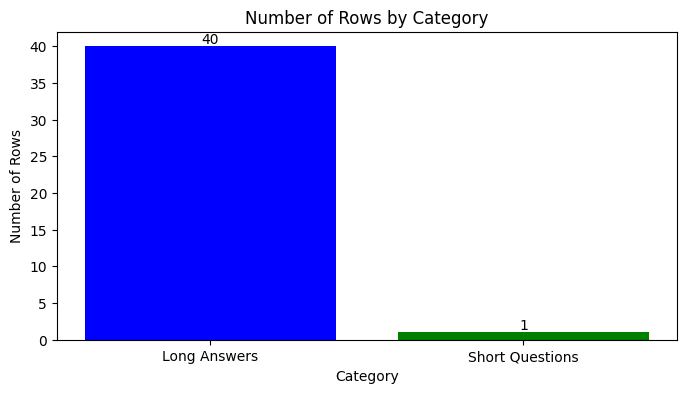

In [6]:
import matplotlib.pyplot as plt

def fliter_data(df):

    # 检查`answer`栏中字符数超过1000的行
    long_answers = df[df['answer'].apply(len) > 1000]
    long_answers_count = len(long_answers)
    # 导出这些行为JSON文件
    long_answers.to_json('./answers_toolong.json', orient='records', lines=True)

    # 检查`question`栏中字符数小于8的行
    lack_question = df[df['question'].apply(len) < 8]
    short_questions_count = len(lack_question)
    
    # 导出这些行为JSON文件
    lack_question.to_json('./lack_question.json', orient='records', lines=True)

    #建立图表数据
    data = {'Long Answers': long_answers_count, 'Short Questions': short_questions_count}
    categories = list(data.keys())
    counts = list(data.values())
    
    # 创建柱状图
    plt.figure(figsize=(8,4))  # 设置图形的大小
    plt.bar(categories, counts, color=['blue', 'green'])  # 选择柱状颜色
    plt.xlabel('Category')  # x轴标签
    plt.ylabel('Number of Rows')  # y轴标签
    plt.title('Number of Rows by Category')  # 图形标题
    
    bars = plt.bar(categories, counts, color=['blue', 'green'], width=0.4)  # 设置柱状颜色和宽度

    # 在每个柱子上方添加数字
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')
        
    plt.show()
    
    fliterder_df = df[~(df['answer'].apply(len) > 1000) & ~(df['question'].apply(len) < 8)]

    return fliterder_df

fliterder_df = fliter_data(df).copy()

In [7]:
fliterder_df['answer'] = fliterder_df['answer'].str.rstrip('\\ ')



#fliterder_df.loc[9482:9483]

In [8]:
def process_dataframe(df):

    # 定义格式化函数以确保所有小步骤前都有换行符插入
    def format_steps_with_newline(text):    
        # 检查文本中是否包含"【解析】"
        if "【解析】" in text:
            parts = text.split("【解析】", 1)  # 从"【解析】"分割文本
            return "<解析>" + insert_newlines(parts[1]) if len(parts) > 1 else "【解析】后无内容"
        elif "解析" in text:
            parts = text.split("解析", 1)
            return "<解析>" + insert_newlines(parts[1]) if len(parts) > 1 else "解析后无内容"
        else:
            return "没有解析"

    def insert_newlines(text):
        # 在所有步骤前插入换行符
        return re.sub(r'(\（[一二三四五六七八九十]+\）|\（\d+\）)', r'\n\1', text)

    # 应用格式化函数到 'answer' 列，并创建新列 'cot'
    df.loc[:, 'cot'] = df['answer'].apply(format_steps_with_newline)
    return df

   



# 调用函数并查看处理后的结果
processed_df = process_dataframe(fliterder_df)
#processed_df.loc[9482:9483]  # 打印前几行数据查看效果
processed_df.head()

,question,answer,detail_data,topic_number,cot
0,3.我们经常将调查、收集得来的数据用各类统计图进行整理与表示．下列统计图中，能凸显由数据所表现出来的部分与整体的关系的是()\nA. 条形图 B. 扇形图\nC. 折线图 D. 频数分布直方图,【答案】B\n【解析】\n【分析】\n根据统计图的特点判定即可．\n【详解】解：统计图中，能凸显由数据所表现出来的部分与整体的关系的是扇形图．\n故选：B．\n【点睛】本题考查了统计图的特点，条件统计图能反映各部分的具体数值，扇形统计图能反映各个部分占总体的百分比，折线统计图能反映样本或总体的趋势，频数分布直方图能反映样本或总体的分布情况，熟练掌握各统计图的特点是解题的关键．,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN,<解析>\n【分析】\n根据统计图的特点判定即可．\n【详解】解：统计图中，能凸显由数据所表现出来的部分与整体的关系的是扇形图．\n故选：B．\n【点睛】本题考查了统计图的特点，条件统计图能反映各部分的具体数值，扇形统计图能反映各个部分占总体的百分比，折线统计图能反映样本或总体的趋势，频数分布直方图能反映样本或总体的分布情况，熟练掌握各统计图的特点是解题的关键．
1,"9.如果函数y＝kx（k≠0）的图象经过第二、四象限，那么y的值随x的值增大而\_\_\_\_\_．（填""增大""或""减小""）",【答案】减小\n【解析】\n【分析】\n根据正比例函数的性质进行解答即可．\n【详解】解：函数y＝kx（k≠0）的图象经过第二、四象限，那么y的值随x的值增大而减小，\n故答案为：减小．\n【点睛】此题考查的是判断正比例函数的增减性，掌握正比例函数的性质是解决此题的关键．,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN,<解析>\n【分析】\n根据正比例函数的性质进行解答即可．\n【详解】解：函数y＝kx（k≠0）的图象经过第二、四象限，那么y的值随x的值增大而减小，\n故答案为：减小．\n【点睛】此题考查的是判断正比例函数的增减性，掌握正比例函数的性质是解决此题的关键．
2,10.如果关于x的方程x^2^﹣4x+m=0有两个相等的实数根，那么m的值是\_\_\_\_．,【答案】4．\n【解析】\n【分析】\n一元二次方程有两个相等的实根，即根的判别式△=b^2^-4ac=0，即可求m值．\n【详解】依题意．\n∵方程x^2^﹣4x+m=0有两个相等的实数根，\n∴△=b^2^﹣4ac=(﹣4)^2^﹣4m=0，\n解得：m=4．\n故答案为：4．\n【点睛】此题主要考查的是一元二次方程的根判别式，当△=b^2^-4ac=0时，方程有两个相等的实根，当△=b^2^-4ac＞0时，方程有两个不相等的实根，当△=b^2^-4ac＜0时，方程无实数根．,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN,<解析>\n【分析】\n一元二次方程有两个相等的实根，即根的判别式△=b^2^-4ac=0，即可求m值．\n【详解】依题意．\n∵方程x^2^﹣4x+m=0有两个相等的实数根，\n∴△=b^2^﹣4ac=(﹣4)^2^﹣4m=0，\n解得：m=4．\n故答案为：4．\n【点睛】此题主要考查的是一元二次方程的根判别式，当△=b^2^-4ac=0时，方程有两个相等的实根，当△=b^2^-4ac＞0时，方程有两个不相等的实根，当△=b^2^-4ac＜0时，方程无实数根．
3,"28.（2013浙江）已知函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image622.wmf){width=""2.7395833333333335in""\nheight=""0.21875in""}，则""![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image623.wmf){width=""0.375in""\nheight=""0.21875in""}是奇函数""是![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image624.wmf){width=""0.4583333333333333in""\nheight=""0.4270833333333333in""}的\nA．充分不必要条件 B．必要不充分条件\nC．充分必要条件 D．既不充分也不必要条件",【答案】B【解析】由f(x)是奇函数可知f(0)=0，即cosφ=0，解出φ=+kπ，k∈Z，所以选项B正确．,"{'origin': '专题02 常用逻辑用语（解析版）.md', 'pic_count': 0, 'images': {}}",NaN,<解析>由f(x)是奇函数可知f(0)=0，即cosφ=0，解出φ=+kπ，k∈Z，所以选项B正确．
4,"31.(2012山东)设![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image641.wmf){width=""0.40625in""\nheight=""0.19791666666666666in""}且![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image642.wmf){width=""0.375in""\nheight=""0.19791666666666666in""}，则""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image643.wmf){width=""0.6770833333333334in""\nheight=""0.25in""}在![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image644.wmf){width=""0.16666666666666666in""\nheight=""0.17708333333333334in""}上是减函数""是""![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image645.wmf){width=""1.09375in""\nheight=""0.25in""}在![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image644.wmf){width=""0.16666666666666666in""\nheight=""0.17708333333333334in""}上是增函数""的\nA．充分不必要条件 B．必要不充分条件\nC．充分必要条件 D．既不充分也不必要条件","【答案】A【解析】p：""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image643.wmf){width=""0.6770833333333334in""\nheight=""0.25in""}在R上是减函数\n""等价于![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image646.wmf){width=""0.625in""\nheight=""0.19791666666666666in""}；q：""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image645.wmf){width=""1.09375in""\nheight=""0.25in""}在R上是增函数""等价于![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image647.wmf){width=""0.6354166666666666in""\nheight=""0.19791666666666666in""}，即![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image648.wmf){width=""0.6979166666666666in""\nheight=""0.21875in""}且a≠1，

In [56]:
processed_df.loc[544:546]

,question,answer,detail_data,topic_number,cot
544,34.从气候的角度，分析11个国家研究选择适应性强的树种的原因，并说明该类树种的基本特性。（4分）,34.原因：绿化带地处热带稀树草原气候区北缘，这里旱季干旱，土壤水分含量低，本地原有树种无法密集生长，且旱季落叶，起不到遏制荒漠化发展的作用。特性：比本地原来树种更加耐旱，且旱季不落叶，以利密集种植，有效抵御风沙。,"{'origin': '2016年普通高等学校招生全国统一考试 地理 (上海卷) word版.md', 'pic_count': 0, 'images': {}}",34.0,没有解析
545,36.概括渭河干流的主要水文特征。（4分）,"36.河流径流量较小；流速较稳定；汛期一般出现在7、8月；河水含沙量较大；有结冰期。（""汛期""必答；其余任答一点即可。）","{'origin': '2016年普通高等学校招生全国统一考试 地理 (上海卷) word版.md', 'pic_count': 0, 'images': {}}",36.0,没有解析
546,37.目前渭河河道淤积严重。根据南、北两侧支流的特征，分析该问题产生的原因。（4分）,37.渭河北侧：支流多而长，流经黄土高原，带来大量泥沙，尤其是每年7、8月暴雨多，水土流失更加严重，带来的泥沙更多。渭河南侧：多发源于秦岭山区，支流短，水流急，易于带来泥沙。,"{'origin': '2016年普通高等学校招生全国统一考试 地理 (上海卷) word版.md', 'pic_count': 0, 'images': {}}",37.0,没有解析


# BERT词嵌入


In [11]:
from transformers import BertTokenizer, BertModel
import torch

# 初始化tokenizer和model
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
model = BertModel.from_pretrained('bert-base-chinese')

def encode_text(text):
    """ 使用BERT模型编码文本 """
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :]

def cosine_similarity(a, b):
    """ 计算两个向量之间的余弦相似度 """
    return torch.nn.functional.cosine_similarity(a, b).item()



In [12]:
def extract_letters(text):
    """从文本中提取所有字母"""
    return ''.join(re.findall("[A-Za-z]", text))

def remove_analysis_from_answer(answer, keywords):
    """移除答案中的解析内容"""
    for keyword in keywords:
        keyword_pos = answer.find(keyword)
        if keyword_pos != -1:
            return answer[:keyword_pos].strip()  # 只返回关键字之前的内容
    return answer

def update_answers(df):
    """更新DataFrame中答案列的内容"""
    df = df.copy()
    encoded_phrase_first = encode_text("故答案为A") # 预先计算
    encoded_phrase_last  = encode_text("30.B.［解析］")
    
    keywords = ['【解析】', '【答案解析】', '解析']
    for i, row in df.iterrows():
        answer = row['answer']
        if len(row['cot']) < 6:
            continue
        first_part = answer[:8]
        last_part = answer[-8:]
        first_similarity = cosine_similarity(encode_text(first_part), encoded_phrase_first)
        last_similarity = cosine_similarity(encode_text(last_part), encoded_phrase_last)
        
        
        if first_similarity > last_similarity:
            df.loc[i, 'answer'] = extract_letters(first_part)
            
        elif last_similarity > first_similarity:
            df.loc[i, 'answer'] = extract_letters(last_part)
            
        elif extract_letters(first_part) == extract_letters(last_part) == '':
            df.loc[i, 'answer'] = remove_analysis_from_answer(answer, keywords)    
        
        else:
            df.loc[i, 'answer'] = extract_letters(first_part)

    return df
#03, 382行
bert_df = update_answers(processed_df.head())
bert_df

,question,answer,detail_data,topic_number,cot
0,3.我们经常将调查、收集得来的数据用各类统计图进行整理与表示．下列统计图中，能凸显由数据所表现出来的部分与整体的关系的是()\nA. 条形图 B. 扇形图\nC. 折线图 D. 频数分布直方图,B,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN,<解析>\n【分析】\n根据统计图的特点判定即可．\n【详解】解：统计图中，能凸显由数据所表现出来的部分与整体的关系的是扇形图．\n故选：B．\n【点睛】本题考查了统计图的特点，条件统计图能反映各部分的具体数值，扇形统计图能反映各个部分占总体的百分比，折线统计图能反映样本或总体的趋势，频数分布直方图能反映样本或总体的分布情况，熟练掌握各统计图的特点是解题的关键．
1,"9.如果函数y＝kx（k≠0）的图象经过第二、四象限，那么y的值随x的值增大而\_\_\_\_\_．（填""增大""或""减小""）",,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN,<解析>\n【分析】\n根据正比例函数的性质进行解答即可．\n【详解】解：函数y＝kx（k≠0）的图象经过第二、四象限，那么y的值随x的值增大而减小，\n故答案为：减小．\n【点睛】此题考查的是判断正比例函数的增减性，掌握正比例函数的性质是解决此题的关键．
2,10.如果关于x的方程x^2^﹣4x+m=0有两个相等的实数根，那么m的值是\_\_\_\_．,,"{'origin': '上海-word解析.md', 'pic_count': 0, 'images': {}}",NaN,<解析>\n【分析】\n一元二次方程有两个相等的实根，即根的判别式△=b^2^-4ac=0，即可求m值．\n【详解】依题意．\n∵方程x^2^﹣4x+m=0有两个相等的实数根，\n∴△=b^2^﹣4ac=(﹣4)^2^﹣4m=0，\n解得：m=4．\n故答案为：4．\n【点睛】此题主要考查的是一元二次方程的根判别式，当△=b^2^-4ac=0时，方程有两个相等的实根，当△=b^2^-4ac＞0时，方程有两个不相等的实根，当△=b^2^-4ac＜0时，方程无实数根．
3,"28.（2013浙江）已知函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image622.wmf){width=""2.7395833333333335in""\nheight=""0.21875in""}，则""![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image623.wmf){width=""0.375in""\nheight=""0.21875in""}是奇函数""是![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image624.wmf){width=""0.4583333333333333in""\nheight=""0.4270833333333333in""}的\nA．充分不必要条件 B．必要不充分条件\nC．充分必要条件 D．既不充分也不必要条件",B,"{'origin': '专题02 常用逻辑用语（解析版）.md', 'pic_count': 0, 'images': {}}",NaN,<解析>由f(x)是奇函数可知f(0)=0，即cosφ=0，解出φ=+kπ，k∈Z，所以选项B正确．
4,"31.(2012山东)设![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image641.wmf){width=""0.40625in""\nheight=""0.19791666666666666in""}且![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image642.wmf){width=""0.375in""\nheight=""0.19791666666666666in""}，则""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image643.wmf){width=""0.6770833333333334in""\nheight=""0.25in""}在![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image644.wmf){width=""0.16666666666666666in""\nheight=""0.17708333333333334in""}上是减函数""是""![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image645.wmf){width=""1.09375in""\nheight=""0.25in""}在![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image644.wmf){width=""0.16666666666666666in""\nheight=""0.17708333333333334in""}上是增函数""的\nA．充分不必要条件 B．必要不充分条件\nC．充分必要条件 D．既不充分也不必要条件",A,"{'origin': '专题02 常用逻辑用语（解析版）.md', 'pic_count': 0, 'images': {}}",NaN,"<解析>p：""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image643.wmf){width=""0.6770833333333334in""\nheight=""0.25in""}在R上是减函数\n""等价于![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image646.wmf){width=""0.625in""\nheight=""0.19791666666666666in""}；q：""函数![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image645.wmf){width=""1.09375in""\nheight=""0.25in""}在R上是增函数""等价于![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image647.wmf){width=""0.6354166666666666in""\nheight=""0.19791666666666666in""}，即![学科网(www.zxxk.com)\--教育资源门户，提供试卷、教案、课件、论文、素材及各类教学资源下载，还有大量而丰富的教学相关资讯！](media/image648.wmf){width=""0.6979166666666666in""\nheight=""0.21875in""}且a≠1，故p是q成立的充分不必要条件．选A．"


# 其他


In [18]:
def check_similarity(text, target_phrase, threshold=0.75):
    
    #检查文本中是否包含与目标短语相似的内容。

    #参数:
    #text (str): 待检查的文本。
    #target_phrase (str): 目标短语。
    #threshold (float): 判断为相似的阈值。

    #返回:
    #bool: 如果相似度大于等于阈值，则返回True，否则返回False。
    
    # 对目标短语和输入文本进行编码
    target_embedding = encode_text(target_phrase)
    text_embedding = encode_text(text)

    # 计算相似度
    sim = cosine_similarity(target_embedding, text_embedding)
    return sim 
#>= threshold"""

# 示例使用
#example_text = "答案为D。\""

#result = check_similarity(example_text)
#print("包含与'故答案为A'相似的内容吗？", result)

def analyze_answers(df):
    """分析DataFrame中答案的前六和后六个字符与‘故答案为A’的相似度，并返回具有较高相似度部分中的字母"""
    results = []
    for index, row in df.iterrows():
        answer = row['answer']
        if len(answer) < 6:
            results.append("Too short")  # 如果答案长度小于6，直接返回Too short
            continue
        first_part = answer[:6]
        last_part = answer[-6:]
        # 计算相似度
        first_similarity = cosine_similarity(encode_text(first_part), encode_text("30.B.［解析］"))
        last_similarity = cosine_similarity(encode_text(last_part), encode_text("故答案为A"))
        # 判断哪部分相似度更高并处理
        if first_similarity > last_similarity:
            results.append(extract_letters(first_part))  # 提取并返回前六个字符中的字母
        elif last_similarity > first_similarity:
            results.append(extract_letters(last_part))  # 提取并返回后六个字符中的字母
        else:
            results.append('no')  # 相似度相等也返回后六个字符中的字母
        results.append(first_similarity)
        results.append(last_similarity)
    return results

In [22]:

results = analyze_answers(processed_df.head())  # 应用.tail() 获取最后几行

"""【答案】减小\n【解析】\n【分析】\n根据正比例函数的性质进行解答即可．\n【详解】解：函数y＝kx（k≠0）的图象经过第二、四象限，那么y的值随x的值增大而减小，\n故答案为：减小．\n【点睛】此题考查的是判断正比例函数的增减性，掌握正比例函数的性质是解决此题的关键．"""
#text = '解决此题的关键．'
#target_first = "30.B.［解析］"
#target_end = "故答案为A"
#results = check_similarity(text,target_end)
print(results)

['', 0.7580758333206177, 0.7803184390068054, '', 0.74093097448349, 0.7705203294754028, '', 0.717968761920929, 0.7884950041770935, 'B', 0.7843649387359619, 0.8821560740470886, 'A', 0.7843649387359619, 0.8138821721076965]


In [57]:
def jqwe(df):
    res = []
    for i, row in df.iterrows():
        if "【分析】" in row['question']:
            res.append(i)
    return res
jqwe(processed_df)

[]